In [1]:
"""
** Link: http://onlinestatbook.com/2/regression/intro.html
(http://onlinestatbook.com/2/regression/intro.html) **
Case study: "SAT and College GPA" có điểm của Trung học và Đại học cho 105 SV vào học
chuyên ngành Computer Science ở một trường công lập địa phương. Chúng ta dự đoán
university GPA nếu chúng ta biết high school GPA của sinh viên.
Cho dữ liệu sat.xls
Đọc dữ liệu trên vào dataframe
Trực quan hóa dữ liệu theo High School GPA, University GPA
X = High School GPA đã chuyển theo định dạng chuẩn, y = University GPA
Với y = mx + b (University GPA = m * High School GPA + b), gọi hàm tính m, b: theta =
gradient_descent_2(alpha, X, y, 1000)
Từ m, b (m = theta[1], b = theta[0]) => dự đoán University GPA theo m, b
Trực quan hóa dữ liệu
Với High School GPA là 2.3, 2.8,3.3, 3.8 thì University GPA lần lượt là bao nhiêu?
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.datasets.samples_generator import make_regression
from scipy import stats

In [3]:
data = pd.read_excel("sat.xls")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
high_GPA    105 non-null float64
math_SAT    105 non-null int64
verb_SAT    105 non-null int64
comp_GPA    105 non-null float64
univ_GPA    105 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.1 KB


In [7]:
high_GPA = data.high_GPA.values
high_GPA.size

105

In [16]:
data

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
5,2.10,562,486,2.64,2.37
6,2.82,573,548,2.86,2.40
7,2.36,559,536,2.03,2.24
8,2.42,552,583,2.81,3.02
9,3.51,617,591,3.41,3.32


In [15]:
len(high_GPA)

105

In [17]:
high_GPA

array([3.45, 2.78, 2.52, 3.67, 3.24, 2.1 , 2.82, 2.36, 2.42, 3.51, 3.48,
       2.14, 2.59, 3.46, 3.51, 3.68, 3.91, 3.72, 2.15, 2.48, 3.09, 2.71,
       2.46, 3.32, 3.61, 3.82, 2.64, 2.19, 3.34, 3.48, 3.56, 3.81, 3.92,
       4.  , 2.52, 2.71, 3.15, 3.22, 2.29, 2.03, 3.14, 3.52, 2.91, 2.83,
       2.65, 2.41, 2.54, 2.66, 3.21, 3.34, 3.68, 2.84, 2.74, 2.71, 2.24,
       2.48, 3.14, 2.83, 3.44, 2.89, 2.67, 3.24, 3.29, 3.87, 3.94, 3.42,
       3.52, 2.24, 3.29, 3.41, 3.56, 3.61, 3.28, 3.21, 3.48, 3.62, 2.92,
       2.81, 3.11, 3.28, 2.7 , 2.62, 3.72, 3.42, 3.51, 3.28, 3.42, 3.9 ,
       3.12, 2.83, 2.09, 3.17, 3.28, 3.02, 3.42, 3.06, 2.76, 3.19, 2.23,
       2.48, 3.76, 3.49, 3.07, 2.19, 3.46])

In [18]:
univ_GPA = data.univ_GPA.values
univ_GPA.size

105

In [19]:
import seaborn as sns

<Figure size 864x864 with 0 Axes>

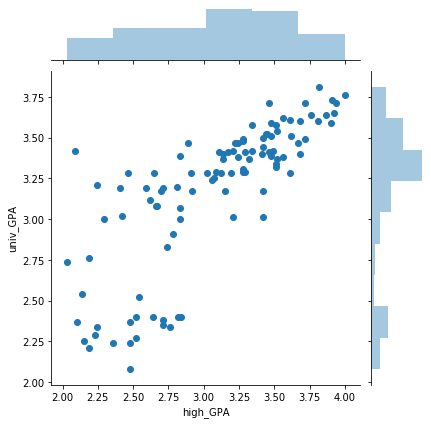

In [20]:
plt.figure(figsize=(12,12))
sns.jointplot(x='high_GPA', y = 'univ_GPA', data=data)
plt.show()

In [21]:
def gradient_descent_2(alpha,x,y,numIterations):
    m=x.shape[0]
    theta=np.ones(2)
    for iter in range(0,numIterations):
        hypothesis=np.dot(x,theta)
        loss=hypothesis -y
        J=np.sum(loss * 2) /(2 * m)
        print ("inter %s | J:%.3f" % (iter,J))
        theta0_prime=np.sum(loss)/m
        theta1_prime=np.sum(loss * x[:,1])/m
        grandient=np.array([theta0_prime,theta1_prime])
        theta=theta - alpha * grandient
    return theta

In [22]:
m = high_GPA.size
X = np.c_[ np.ones(m), high_GPA] # insert column
y = univ_GPA
alpha = 0.01 # learning rate
theta = gradient_descent_2(alpha, X, y, 1000)

inter 0 | J:0.904
inter 1 | J:0.806
inter 2 | J:0.720
inter 3 | J:0.642
inter 4 | J:0.573
inter 5 | J:0.511
inter 6 | J:0.456
inter 7 | J:0.407
inter 8 | J:0.363
inter 9 | J:0.323
inter 10 | J:0.288
inter 11 | J:0.257
inter 12 | J:0.229
inter 13 | J:0.204
inter 14 | J:0.182
inter 15 | J:0.162
inter 16 | J:0.144
inter 17 | J:0.128
inter 18 | J:0.114
inter 19 | J:0.101
inter 20 | J:0.090
inter 21 | J:0.080
inter 22 | J:0.071
inter 23 | J:0.063
inter 24 | J:0.056
inter 25 | J:0.049
inter 26 | J:0.043
inter 27 | J:0.038
inter 28 | J:0.034
inter 29 | J:0.030
inter 30 | J:0.026
inter 31 | J:0.023
inter 32 | J:0.020
inter 33 | J:0.017
inter 34 | J:0.015
inter 35 | J:0.013
inter 36 | J:0.011
inter 37 | J:0.009
inter 38 | J:0.008
inter 39 | J:0.007
inter 40 | J:0.005
inter 41 | J:0.004
inter 42 | J:0.003
inter 43 | J:0.003
inter 44 | J:0.002
inter 45 | J:0.001
inter 46 | J:0.001
inter 47 | J:0.000
inter 48 | J:-0.000
inter 49 | J:-0.001
inter 50 | J:-0.001
inter 51 | J:-0.002
inter 52 | J:-0.00

In [25]:
#X[0:5]
print("m = ", theta[1], "b = ", theta[0])
for i in range(X.shape[1]):
    univ_GPA_predict = theta[1]* X + theta[0]

m =  0.7198164351685972 b =  0.9549233210815302


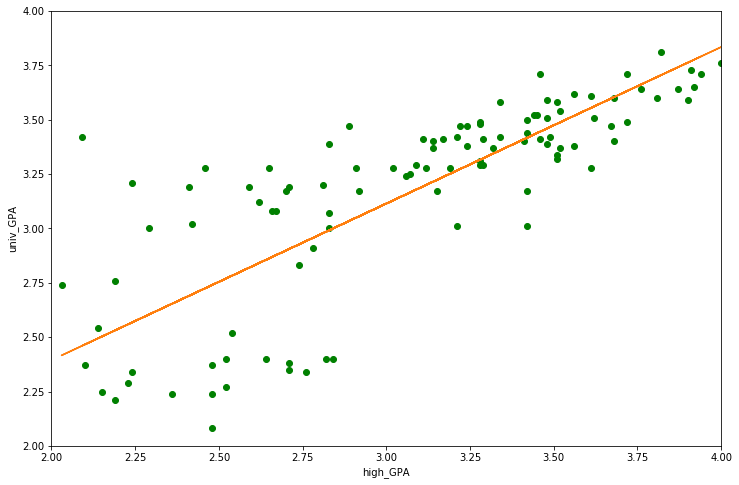

In [26]:
plt.figure(figsize=(12,8))
plt.xlim(2.0,4.0)
plt.ylim(2.0,4.0)
plt.scatter(X[:,1], univ_GPA, color="green")
plt.plot(X, univ_GPA_predict)
plt.xlabel("high_GPA")
plt.ylabel("univ_GPA")
plt.show()

In [27]:
high_GPA_new= np.array([2.3, 2.8,3.3, 3.8])
univ_GPA_new = theta[1]*high_GPA_new + theta[0]
univ_GPA_new

array([2.61050112, 2.97040934, 3.33031756, 3.69022577])